# Домашняя работа 2.2

Импортируем все, что нужно.

In [2]:
! pip install wordcloud
! pip install nltk
import nltk
from nltk.tokenize import word_tokenize
from pymorphy2 import MorphAnalyzer
import pandas as pd
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.corpus import webtext
from nltk.probability import FreqDist
import seaborn as sns

Еще раз открываем файл и читаем.

In [3]:
with open("silly_frenchman.txt", encoding='utf-8') as f:
    text = f.read()

Еще раз анализируем текст, берем везде первый разбор; парсируем текст.

In [5]:
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()
ana_mas = []
tok = word_tokenize(text) #токенизируем текст с помощью nltk
tok_filtered = [w.lower() for w in tok if w.isalpha()] #приводим слова к нижнему регистру
for tok in tok_filtered: 
    ana = morph.parse(tok) #парсим с помощью pymorphy
    ana_mas.append(ana)
ana_mas_filtered = []
for i in ana_mas:
    first = i[0] #берем первый разбор слова
    ana_mas_filtered.append(first)

In [9]:
lemms = []
for token in ana_mas_filtered:
    lemm = (token.word, (token.normal_form, token.tag.POS))
    lemms.append(lemm)
    
list_of_lemms = [lemm[1][0] for lemm in lemms]

Преобразовываем данные в датафрейм, записываем в файл, выводим.

In [13]:
def parse(x):
    func = {'word' : x[0], 'lemm' : x.normal_form, 'POS' : x.tag.POS, 'case' : x.tag.case , 'number' : x.tag.number,
         'gender' : x.tag.gender, 'animacy' : x.tag.animacy , 'aspect' : x.tag.aspect, 
         'transitivity' : x.tag.transitivity, 'person' : x.tag.person, 
         'tense' : x.tag.tense, 'mood' : x.tag.mood, 'involvement' : x.tag.involvement, 
         'voice' : x.tag.voice}
    return func
table = []
for token in ana_mas_filtered:
    table.append(parse(token))

In [14]:
datfr = pd.DataFrame(table)
datfr.to_csv('tabl.csv', sep='\t', index=False)

In [27]:
tablo = pd.read_csv('tabl.csv', sep='\t').fillna('')
tablo.head(20)

,POS,animacy,aspect,case,gender,involvement,lemm,mood,number,person,tense,transitivity,voice,word
0,NOUN,anim,,nomn,masc,,клоун,,sing,,,,,клоун
1,PREP,,,,,,из,,,,,,,из
2,NOUN,inan,,gent,masc,,цирк,,sing,,,,,цирка
3,NOUN,anim,,gent,masc,,брат,,plur,,,,,братьев
4,NOUN,anim,,nomn,masc,,гинц,,sing,,,,,гинц
5,NOUN,anim,,nomn,masc,,генри,,sing,,,,,генри
6,NOUN,inan,,nomn,masc,,пуркуа,,sing,,,,,пуркуа
7,VERB,,perf,,masc,,зайти,indc,sing,,past,intr,,зашёл
8,PREP,,,,,,в,,,,,,,в
9,ADJF,,,nomn,masc,,московский,,sing,,,,,московский


Узнаем среднюю длину слова.

Text(0.5, 0, 'Длина слова')

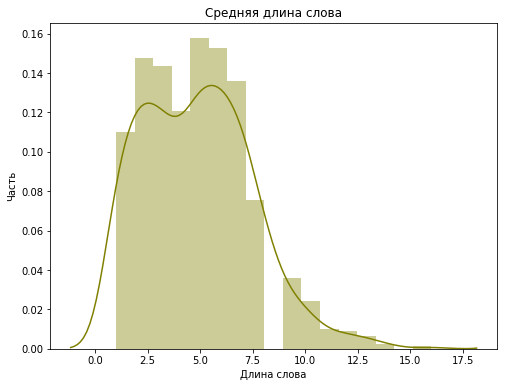

In [38]:
datfr['length'] = datfr['word'].apply(len)
plt.figure(figsize=(8, 6))
sns.distplot(datfr['length'], bins=17, color='olive')
plt.title('Средняя длина слова')
plt.ylabel('Часть')
plt.xlabel('Длина слова')

Построим диаграмму по предлогам.

Text(0, 0.5, 'Количество')

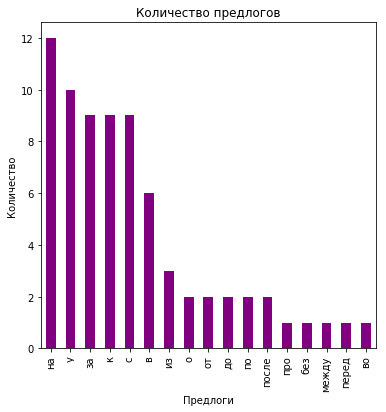

In [43]:
plt.figure(figsize=(6, 6))
tablo[tablo['POS'] == 'PREP']['word'].value_counts().plot.bar(color='purple')
plt.title('Количество предлогов')
plt.xlabel('Предлоги')
plt.ylabel('Количество')

In [ ]:
И по союзам.

Text(0, 0.5, 'Количество')

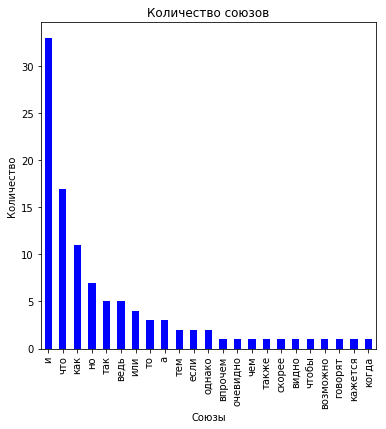

In [41]:
plt.figure(figsize=(6, 6))
tablo[tablo['POS'] == 'CONJ']['word'].value_counts().plot.bar(color='blue')
plt.title('Количество союзов')
plt.xlabel('Союзы')
plt.ylabel('Количество')

Построим облако из слов.

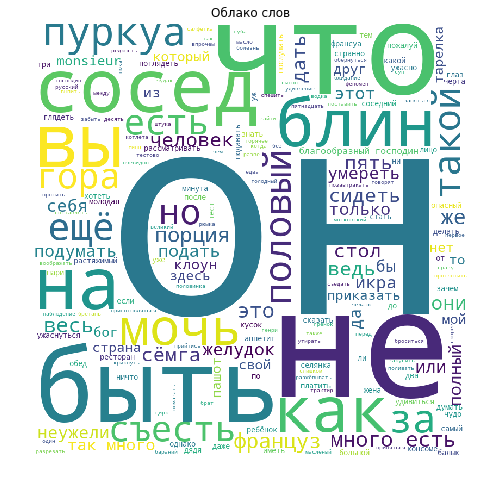

In [23]:
text = ' '.join([word for word in tablo['lemm'].values])
wordcloud = WordCloud(
    background_color ='white',
    width = 800,
    height = 800,
).generate(text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако слов')
plt.show()

Построим диаграмму по частям речи.

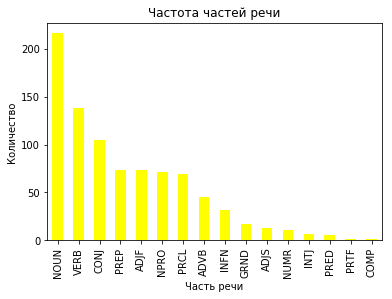

In [37]:
plt.figure(figsize=(6, 4))
datfr ['POS'].value_counts().plot.bar(color='yellow');
plt.xlabel('Часть речи')
plt.title('Частота частей речи')
plt.ylabel('Количество');

Построим график c помощью dispersion plot.

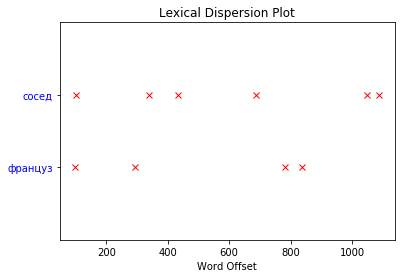

In [47]:
words = ['француз', 'сосед']

with open('silly_frenchman.txt', encoding='utf-8') as f:
    text = f.read()
    token = word_tokenize(text)

points = [(x, y) for x in range(len(token))
          for y in range(len(words)) if token[x] == words[y]]
if points:
    x, y = zip(*points)
else:
    x = y = ()
 
plt.plot(x, y, "rx", scalex=.1)
plt.yticks(range(len(words)), words, color="b")
plt.ylim(-1, len(words))
plt.title("Lexical Dispersion Plot")
plt.xlabel("Word Offset")
plt.show()